Colab link:- https://colab.research.google.com/drive/1kfframFJuX8F8MK7tQIR7pRIbaUfgtzr

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [68]:
# Read csv
df = pd.read_csv('Ola.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [70]:
# removing extra columns
df.drop(columns=['Unnamed: 0'],inplace=True)

In [71]:
# shape of the data
df.shape

(19104, 13)

In [72]:
# checking for null values
df.isna().sum()/df.shape[0]*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [73]:
# checking for duplicate values
df.duplicated().sum()

0

In [74]:
#  statistical summary
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


### Data preprocessing

In [75]:
# changing column names
df.rename(columns={'MMM-YY':'Reporting_Date'},inplace=True)

In [76]:
# convert to datetime
df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

C:\Users\jenil\AppData\Local\Temp\ipykernel_21324\493343300.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'])
C:\Users\jenil\AppData\Local\Temp\ipykernel_21324\493343300.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
C:\Users\jenil\AppData\Local\Temp\ipykernel_21324\493343300.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [77]:
df.head()

,Reporting_Date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [78]:
#Quarterly rating at the beginning
qrf = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})

#Quarterly rating at the end
qrl = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})

#The dataset which has the employee ids and a bollean value which tells if the rating has increased
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()

qr['Quarterly Rating inc'] = qr['Quarterly Rating'].apply(lambda x:1 if x else 0)


In [79]:
# creating the target variable
df['target']=df['LastWorkingDate'].isna().apply(lambda x: 0 if x else 1)

In [80]:
# Aggregating the data
grouped_df = df.groupby('Driver_ID').agg({
    'Reporting_Date':'last',
    'Education_Level':'last',
    'Income':'last',
    'Dateofjoining':'last',
    'Joining Designation':'last',
    'Grade':'first',
    'Total Business Value':'sum',
    'Quarterly Rating':'last',
    'target':'sum',
    'Age': 'last',
    'Gender': 'last',
    'City': 'last',
}).reset_index()

In [81]:
grouped_df.rename(columns={'Reporting_Date':'first_reporting_day'},inplace=True)

In [82]:
grouped_df.drop(columns=['Driver_ID'],inplace=True)

In [83]:
# checking for null values
grouped_df.isna().sum()/grouped_df.shape[0]*100

first_reporting_day     0.0
Education_Level         0.0
Income                  0.0
Dateofjoining           0.0
Joining Designation     0.0
Grade                   0.0
Total Business Value    0.0
Quarterly Rating        0.0
target                  0.0
Age                     0.0
Gender                  0.0
City                    0.0
dtype: float64

In [84]:
final_df = pd.concat([grouped_df,qr['Quarterly Rating inc']],axis=1)

In [85]:
final_df.head()

,first_reporting_day,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Age,Gender,City,Quarterly Rating inc
0,2019-03-01,2,57387,2018-12-24,1,1,1715580,2,1,28.0,0.0,C23,0
1,2020-12-01,2,67016,2020-11-06,2,2,0,1,0,31.0,0.0,C7,0
2,2020-04-01,2,65603,2019-12-07,2,2,350000,1,1,43.0,0.0,C13,0
3,2019-03-01,0,46368,2019-01-09,1,1,120360,1,1,29.0,0.0,C9,0
4,2020-12-01,1,78728,2020-07-31,3,3,1265000,2,0,31.0,1.0,C11,1


In [86]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_reporting_day   2381 non-null   datetime64[ns]
 1   Education_Level       2381 non-null   int64         
 2   Income                2381 non-null   int64         
 3   Dateofjoining         2381 non-null   datetime64[ns]
 4   Joining Designation   2381 non-null   int64         
 5   Grade                 2381 non-null   int64         
 6   Total Business Value  2381 non-null   int64         
 7   Quarterly Rating      2381 non-null   int64         
 8   target                2381 non-null   int64         
 9   Age                   2381 non-null   float64       
 10  Gender                2381 non-null   float64       
 11  City                  2381 non-null   object        
 12  Quarterly Rating inc  2381 non-null   int64         
dtypes: datetime64[ns](

In [87]:
final_df.describe()

,first_reporting_day,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Age,Gender,Quarterly Rating inc
count,2381,2381.00000,2381.000000,2381,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,2020-03-31 15:04:09.475010560,1.00756,59334.157077,2019-02-08 07:14:50.550189056,1.820244,2.078538,4.586742e+06,1.427971,0.678706,33.663167,0.410332,0.150357
min,2019-01-01 00:00:00,0.00000,10747.000000,2013-04-01 00:00:00,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,21.000000,0.000000,0.000000
25%,2019-09-01 00:00:00,0.00000,39104.000000,2018-06-29 00:00:00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,29.000000,0.000000,0.000000
50%,2020-06-01 00:00:00,1.00000,55315.000000,2019-07-21 00:00:00,2.000000,2.000000,8.176800e+05,1.000000,1.000000,33.000000,0.000000,0.000000
75%,2020-12-01 00:00:00,2.00000,75986.000000,2020-05-02 00:00:00,2.000000,3.000000,4.173650e+06,2.000000,1.000000,37.000000,1.000000,0.000000
max,2020-12-01 00:00:00,2.00000,188418.000000,2020-12-28 00:00:00,5.000000,5.000000,9.533106e+07,4.000000,1.000000,58.000000,1.000000,1.000000
std,NaN,0.81629,28383.666384,NaN,0.841433,0.931321,9.127115e+06,0.809839,0.467071,5.983375,0.491997,0.357496


### Univariate Analysis

In [88]:
numerical = ['Income','Total Business Value','Age']
categorical = ['Education_Level','Joining Designation','Grade','Quarterly Rating','Gender','City','Quarterly Rating inc']

In [89]:
final_df['target'].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

- Data is imbalanced

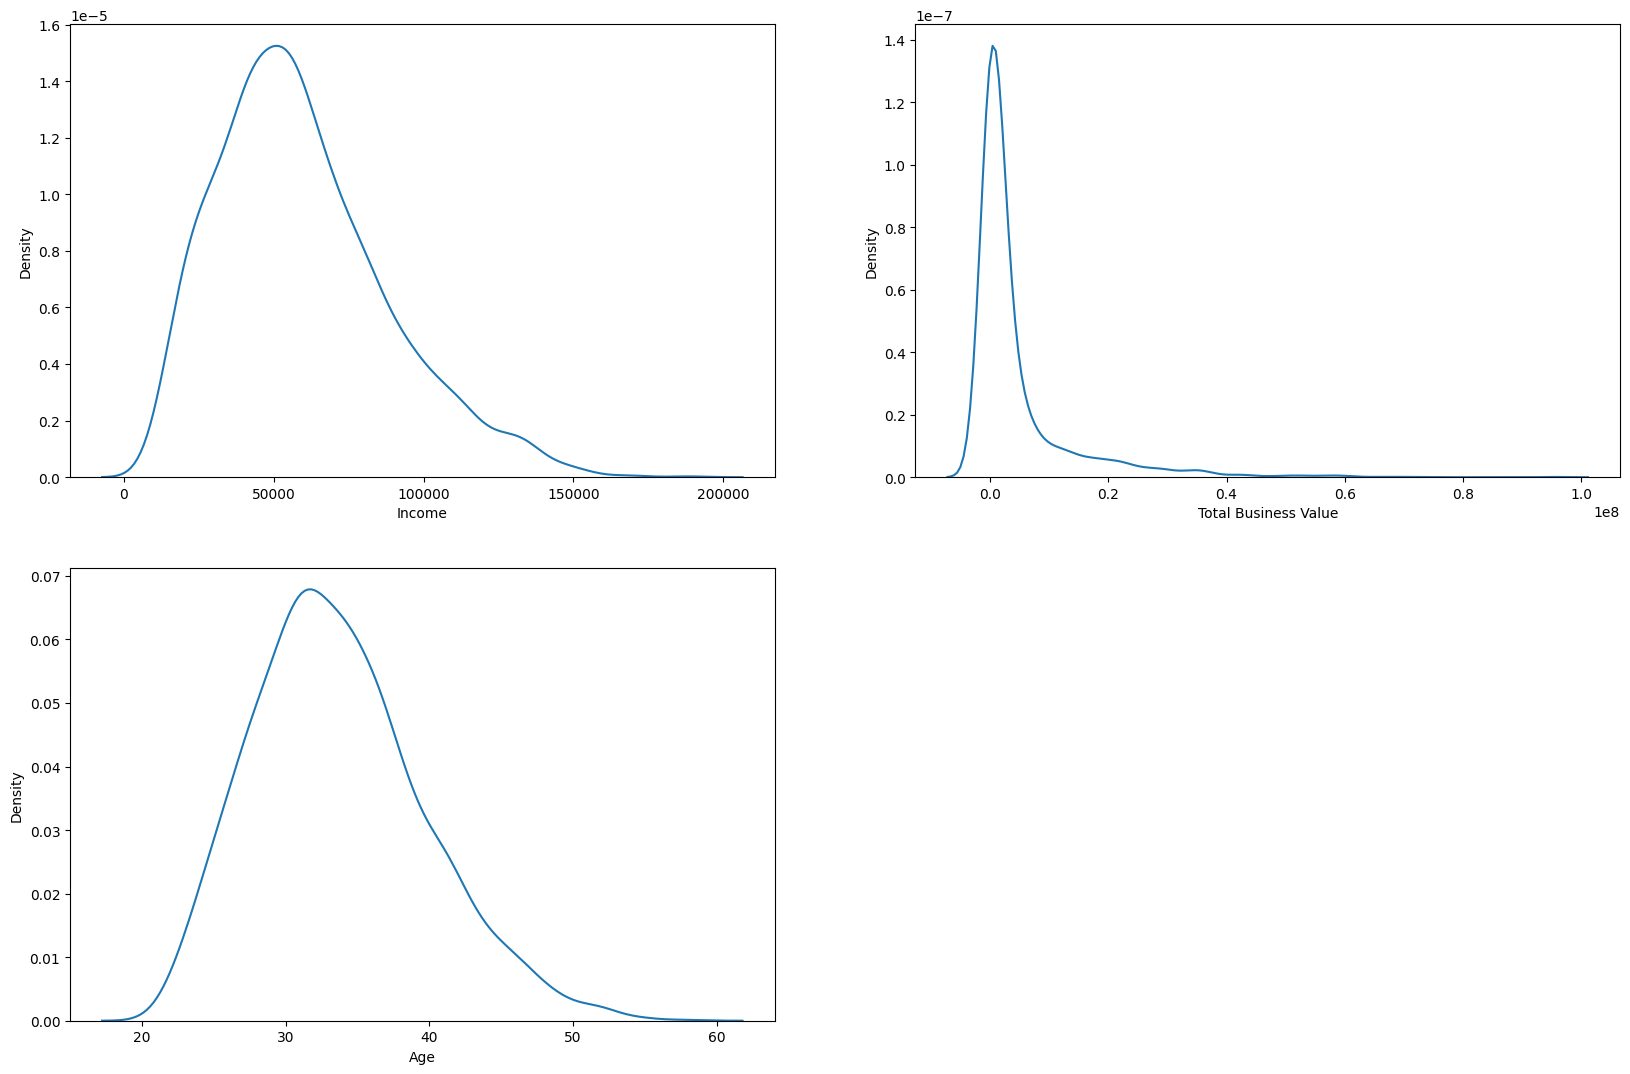

In [90]:
plt.figure(figsize=(20,20))
for ind,i in enumerate(numerical):
    plt.subplot(3,2,ind+1)
    sns.kdeplot(data=final_df,x=i)

- most of the driver has income between 50000 to 75000
- most of the driver has age between 30 to 40

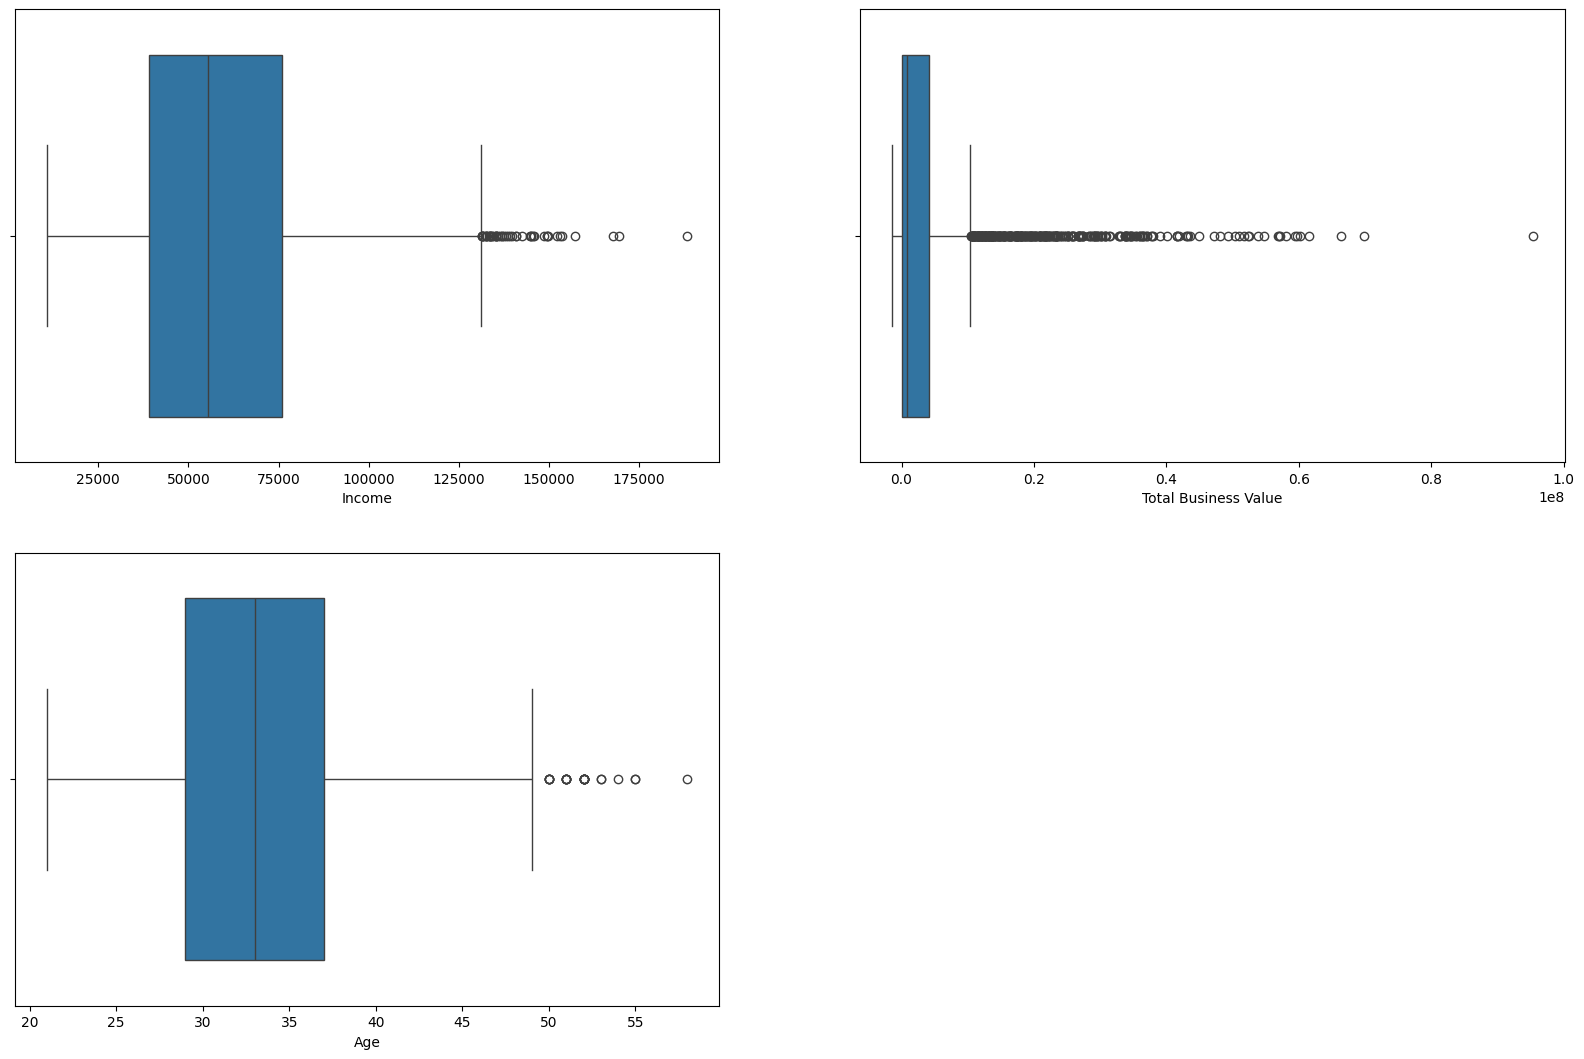

In [91]:
plt.figure(figsize=(20,20))
for ind,i in enumerate(numerical):
    plt.subplot(3,2,ind+1)
    sns.boxplot(data=final_df,x=i)

- there are outliers in Age, income and Total business value column

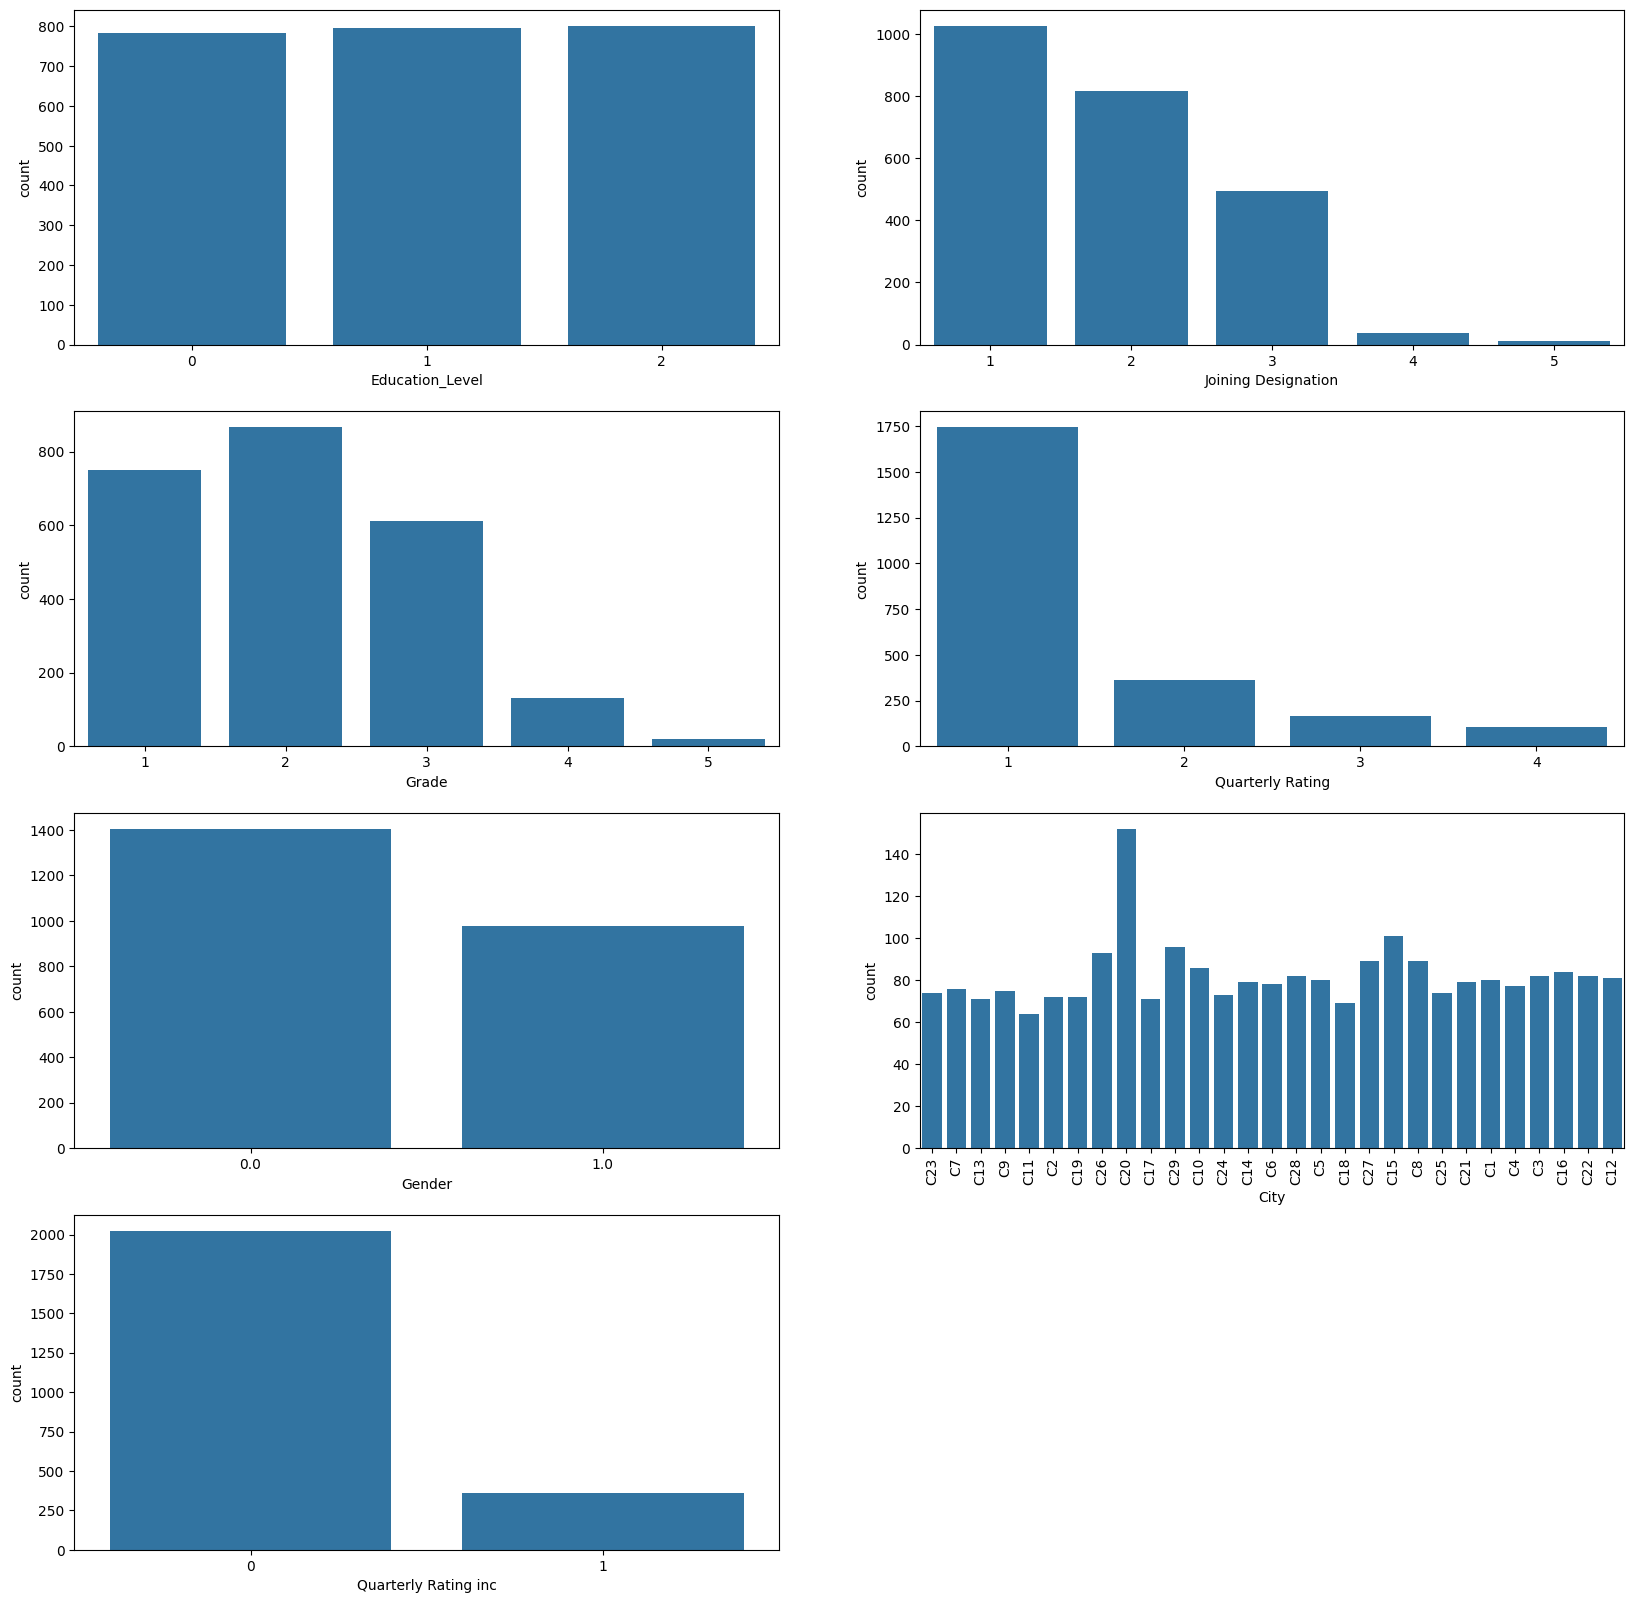

In [92]:
plt.figure(figsize=(20,20))
for ind,i in enumerate(categorical):
    plt.subplot(4,2,ind+1)
    if i == 'City':
        plt.xticks(rotation=90)
        sns.countplot(data=final_df,x=i)
    else:
        sns.countplot(data=final_df,x=i)
        

- education level of all the driver is look almost equal
- more driver has 1 joining designation
- The highest count is for Grade 2, followed by Grade 1 and Grade 3. Grades 4 and 5 have significantly lower counts.
- there is a more male(0) drivers
- c20 has highest count of drivers
- very less driver's Quarterly Rating has increased

### Bivariate Analysis

<AxesSubplot: xlabel='Income', ylabel='Total Business Value'>

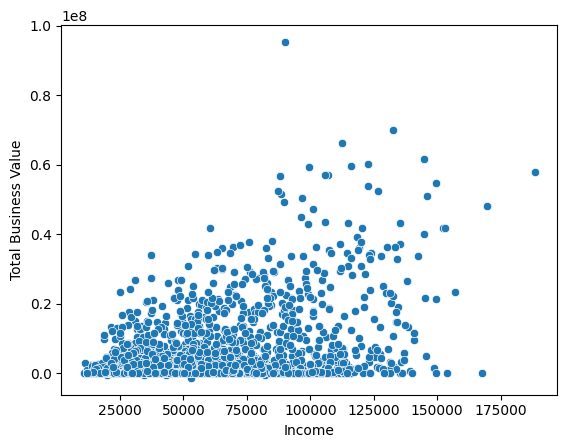

In [93]:
sns.scatterplot(data=final_df,x='Income',y='Total Business Value')

- As the income increases, the total business value has a varied distribution but generally remains low for most samples.

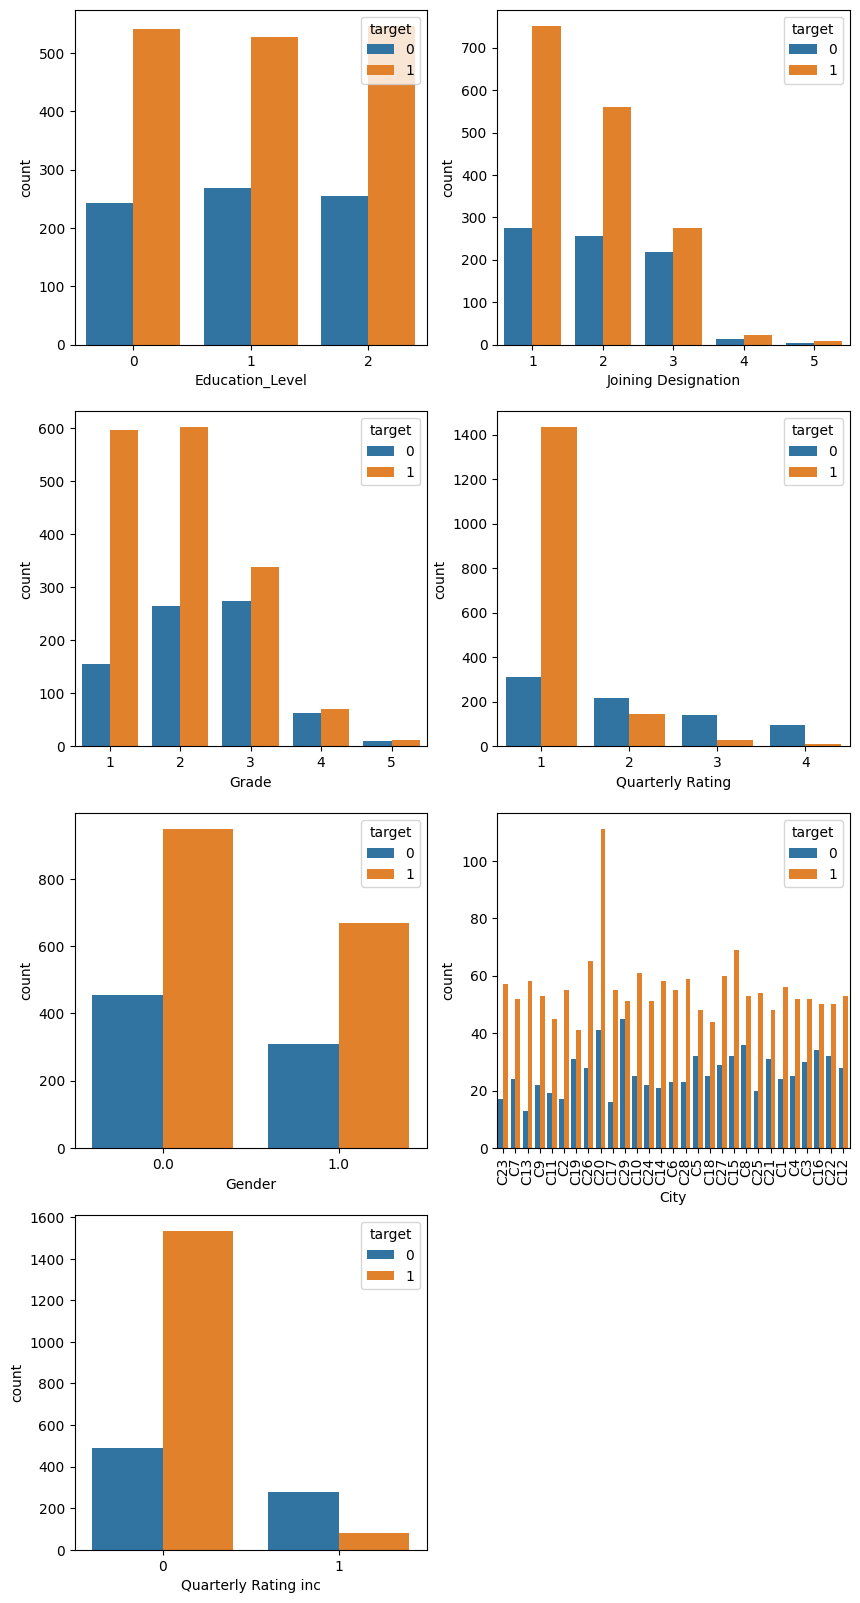

In [94]:
plt.figure(figsize=(10,20))
for ind,i in enumerate(categorical):
    plt.subplot(4,2,ind+1)
    if i == 'City':
        plt.xticks(rotation=90)
        sns.countplot(data=final_df,x=i,hue='target')
    else:
        sns.countplot(data=final_df,x=i,hue='target')

-  The graph shows that individuals with a joining designation of 1 are more likely not leave
- proportaion of education level is almost same
- more individuals with gender labeled as male tend not to leave the organization
- most people leaved organization is from city c20
- the drivers whoose quarterly rating increase are less likely to leave the organzation

In [95]:
final_df['target'].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

<AxesSubplot: >

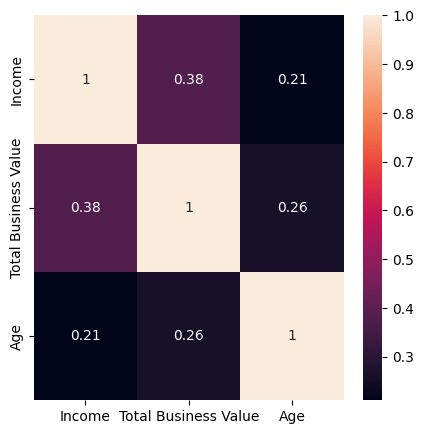

In [96]:
plt.figure(figsize=(5,5))
sns.heatmap(final_df[numerical].corr(numeric_only=True),annot=True)


- There is a moderate positive correlation between Income and Total Business Value.
- There is a weak positive correlation between Income and Age.
- There is a weak positive correlation between Total Business Value and Age.

### Feature engineering

In [97]:
def convert_age(age):
    if 18 <= age <= 30:
        return "young"
    else:
        return "senior"
final_df['Age_cat'] = final_df['Age'].apply(convert_age)

In [98]:
final_df['joining_year'] = final_df['Dateofjoining'].dt.year

In [99]:
# dropping columns
final_df.drop(columns=['first_reporting_day','Dateofjoining'],inplace=True)

In [100]:
final_df.head()

,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Age,Gender,City,Quarterly Rating inc,Age_cat,joining_year
0,2,57387,1,1,1715580,2,1,28.0,0.0,C23,0,young,2018
1,2,67016,2,2,0,1,0,31.0,0.0,C7,0,senior,2020
2,2,65603,2,2,350000,1,1,43.0,0.0,C13,0,senior,2019
3,0,46368,1,1,120360,1,1,29.0,0.0,C9,0,young,2019
4,1,78728,3,3,1265000,2,0,31.0,1.0,C11,1,senior,2020


### Data preparation for modeling

In [101]:
X = final_df.drop(columns=['target'])
Y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,stratify=Y, random_state=1)
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5,stratify=y_test, random_state=1)

In [102]:
ohe_col = ['City','Age_cat']

## RandomForestClassifier

In [139]:
col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse_output=False),ohe_col),remainder='passthrough')
# sampled balance weight
pipeline = make_pipeline(col_transformer,MinMaxScaler(),RandomForestClassifier(class_weight='balanced_subsample'))
param = {'randomforestclassifier__max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,20,30,40,50,60,70], 'randomforestclassifier__n_estimators':[50,100,150,200,250,300],'randomforestclassifier__min_samples_split':[2,10,20,300],'randomforestclassifier__max_features':['sqrt','log2']}
gsv = GridSearchCV(pipeline,param,cv=5,scoring='f1',n_jobs=-1)
gsv.fit(X_train,y_train)
def display(result):
    print('best params:',result.best_params_)
    print('best f1 score:',result.best_score_)
diplay(gsv)
y_pred = gsv.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
# pipeline.named_steps

best params: {'randomforestclassifier__max_depth': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 150}
best f1 score: 0.8825383423955833
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       153
           1       0.86      0.89      0.87       324

    accuracy                           0.83       477
   macro avg       0.80      0.79      0.80       477
weighted avg       0.82      0.83      0.82       477

[[105  48]
 [ 35 289]]


- The Random Forest With Bootstrap Class Weighting method out of all predicted 0 the measure of correctly predicted is 75%, and for 1 it is 86%(Precision).
- The Random Forest With Bootstrap Class Weighting method out of all actual 0 the measure of correctly predicted is 69%, and for 1 it is 89%(Recall).

In [140]:
col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse_output=False),ohe_col),remainder='passthrough')
# balance weight
pipeline = make_pipeline(col_transformer,MinMaxScaler(),RandomForestClassifier(class_weight='balanced'))
param = {'randomforestclassifier__max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,20,30,40,50,60,70], 'randomforestclassifier__n_estimators':[50,100,150,200,250,300],'randomforestclassifier__min_samples_split':[2,10,20,300],'randomforestclassifier__max_features':['sqrt','log2']}
gsv = GridSearchCV(pipeline,param,cv=5,scoring='f1',n_jobs=-1)
gsv.fit(X_train,y_train)
def display(result):
    print('best params:',result.best_params_)
    print('best f1 score:',result.best_score_)
diplay(gsv)
y_pred = gsv.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
# pipeline.named_steps

best params: {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
best f1 score: 0.8810212082226532
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       153
           1       0.85      0.89      0.87       324

    accuracy                           0.82       477
   macro avg       0.80      0.78      0.79       477
weighted avg       0.82      0.82      0.82       477

[[104  49]
 [ 36 288]]


- The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 73%, and for 1 it is 86%(Precision).
- The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 69%, and for 1 it is 88%(Recall).

In [104]:
# x_train_ohe = col_transformer.fit_transform(X_train)
# x_test_ohe = col_transformer.transform(X_test)
# col_transformer.get_feature_names_out()
# pd.DataFrame(
#     x_train_ohe.toarray(),
#     columns=col_transformer.get_feature_names_out(),
# )
# scaler = MinMaxScaler()
# scaler.fit_transform(x_train_ohe.toarray())

## XGBClassifier

In [136]:
col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse_output=False),ohe_col),remainder='passthrough')
pipeline = make_pipeline(col_transformer,MinMaxScaler(),XGBClassifier(class_weight ='balanced'))
param = {'xgbclassifier__max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,20,30,40,50,60,70],'xgbclassifier__learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
gsv_xgb = GridSearchCV(pipeline,param,cv=5,scoring='f1',n_jobs=-1)
gsv_xgb.fit(X_train,y_train)
diplay(gsv_xgb)
y_pred_xgb = gsv_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
# pipeline.named_steps

best params: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 2}
best f1 score: 0.8924394966390518
              precision    recall  f1-score   support

           0       0.80      0.60      0.69       153
           1       0.83      0.93      0.88       324

    accuracy                           0.82       477
   macro avg       0.82      0.77      0.78       477
weighted avg       0.82      0.82      0.82       477

[[ 92  61]
 [ 23 301]]


C:\Users\jenil\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:160: UserWarning: [15:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


- The XGBoost method out of all predicted 0 the measure of correctly predicted is 80%, and for 1 it is 83%(Precision).
- The XGBoost method out of all actual 0 the measure of correctly predicted is 60%, and for 1 it is 93%(Recall).

## SMOTE

In [119]:
sm = SMOTE(random_state=42)
col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse_output=False),ohe_col),remainder='passthrough')
x_train_transformed = col_transformer.fit_transform(X_train)
x_test_transformed = col_transformer.transform(X_test)
X_train_res, y_train_res = sm.fit_resample(x_train_transformed, y_train.ravel())

In [121]:
X_train_res.shape,y_train_res.shape

((2584, 39), (2584,))

In [129]:
# SMOTE with RandomForestClassifier
pipeline = make_pipeline(MinMaxScaler(),RandomForestClassifier())
param = {'randomforestclassifier__max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,20,30,40,50,60,70], 'randomforestclassifier__n_estimators':[50,100,150,200,250,300],'randomforestclassifier__min_samples_split':[2,10,20,300],'randomforestclassifier__max_features':['sqrt','log2']}
gsv = GridSearchCV(pipeline,param,cv=5,scoring='f1',n_jobs=-1)
gsv.fit(X_train_res,y_train_res)
diplay(gsv)
y_pred = gsv.predict(x_test_transformed)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

best params: {'randomforestclassifier__max_depth': 13, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
best f1 score: 0.8824350738522033
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       153
           1       0.85      0.86      0.85       324

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477

[[102  51]
 [ 44 280]]


- The Random Forest With SMOTE method out of all predicted 0 the measure of correctly predicted is 70%, and for 1 it is 85%(Precision).
- The Random Forest With SMOTE method out of all actual 0 the measure of correctly predicted is 67%, and for 1 it is 86%(Recall).

In [130]:
# SMOTE with XGBClassifier
pipeline = make_pipeline(MinMaxScaler(),XGBClassifier())
param = {'xgbclassifier__max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,20,30,40,50,60,70],'xgbclassifier__learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
gsv = GridSearchCV(pipeline,param,cv=5,scoring='f1',n_jobs=-1)
gsv.fit(X_train_res,y_train_res)
diplay(gsv)
y_pred = gsv.predict(x_test_transformed)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

best params: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9}
best f1 score: 0.8795224467058456
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       153
           1       0.85      0.86      0.86       324

    accuracy                           0.81       477
   macro avg       0.78      0.77      0.77       477
weighted avg       0.80      0.81      0.80       477

[[104  49]
 [ 44 280]]


- The XGBoost with SMOTE method out of all predicted 0 the measure of correctly predicted is 70%, and for 1 it is 85%(Precision).
- The XGBoost with SMOTE method out of all actual 0 the measure of correctly predicted is 68%, and for 1 it is 86%(Recall).

## Results Evaluation

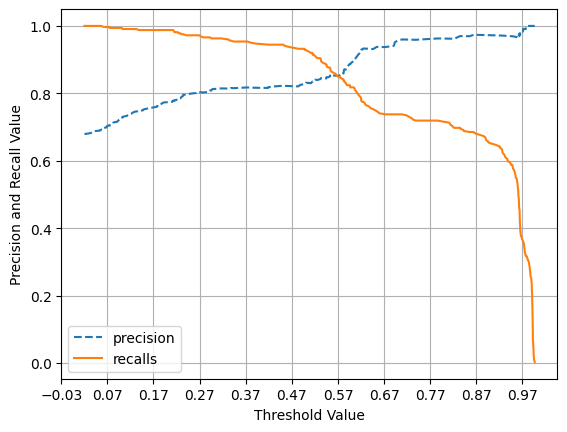

In [137]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, gsv_xgb.predict_proba(X_test)[:,1])

-  The intersection of the precision and recall lines indicates a balance between the two metrics, which can be a useful threshold for the model. and it's 0.57

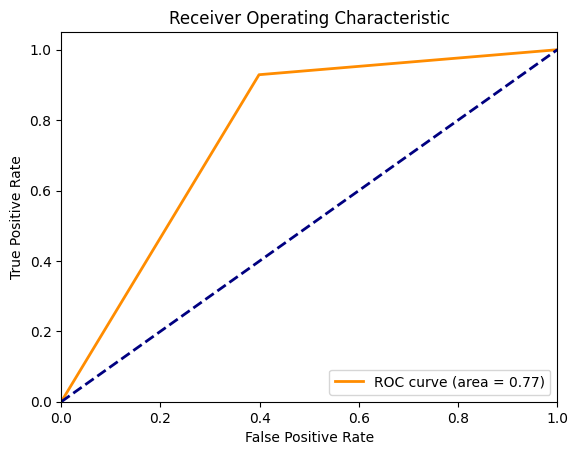

In [135]:
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- The area under the ROC curve (AUC) is 0.77, which indicates moderate performance of the classifier.

-  with above all the prediction we can say that our model is struggling to predict 0(high f1 for 0) due to less data for 0 class for training

In [141]:
# feature importance
# best params: {'randomforestclassifier__max_depth': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 150}
col_transformer = make_column_transformer((OneHotEncoder(drop='first',sparse_output=False),ohe_col),remainder='passthrough')
# balance weight
pipeline = make_pipeline(col_transformer,MinMaxScaler(),RandomForestClassifier(class_weight='balanced_subsample',max_depth=60,max_features='sqrt',min_samples_split=2,n_estimators=150))
pipeline.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['City', 'Age_cat'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=60, n_estimators=150))])

In [162]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       153
           1       0.86      0.89      0.87       324

    accuracy                           0.83       477
   macro avg       0.80      0.79      0.80       477
weighted avg       0.82      0.83      0.82       477

[[105  48]
 [ 35 289]]


In [158]:
columns_names = pipeline.named_steps['columntransformer'].get_feature_names_out()
feature_imp = pipeline.named_steps['randomforestclassifier'].feature_importances_
imp_df = pd.Series(feature_imp, index=columns_names).reset_index()
imp_df.columns = ['column_names','importance']
imp_df

,column_names,importance
0,onehotencoder__City_C10,0.005131
1,onehotencoder__City_C11,0.003882
2,onehotencoder__City_C12,0.007607
3,onehotencoder__City_C13,0.004493
4,onehotencoder__City_C14,0.004328
5,onehotencoder__City_C15,0.006423
6,onehotencoder__City_C16,0.005499
7,onehotencoder__City_C17,0.005049
8,onehotencoder__City_C18,0.004277
9,onehotencoder__City_C19,0.005401


<AxesSubplot: xlabel='column_names', ylabel='importance'>

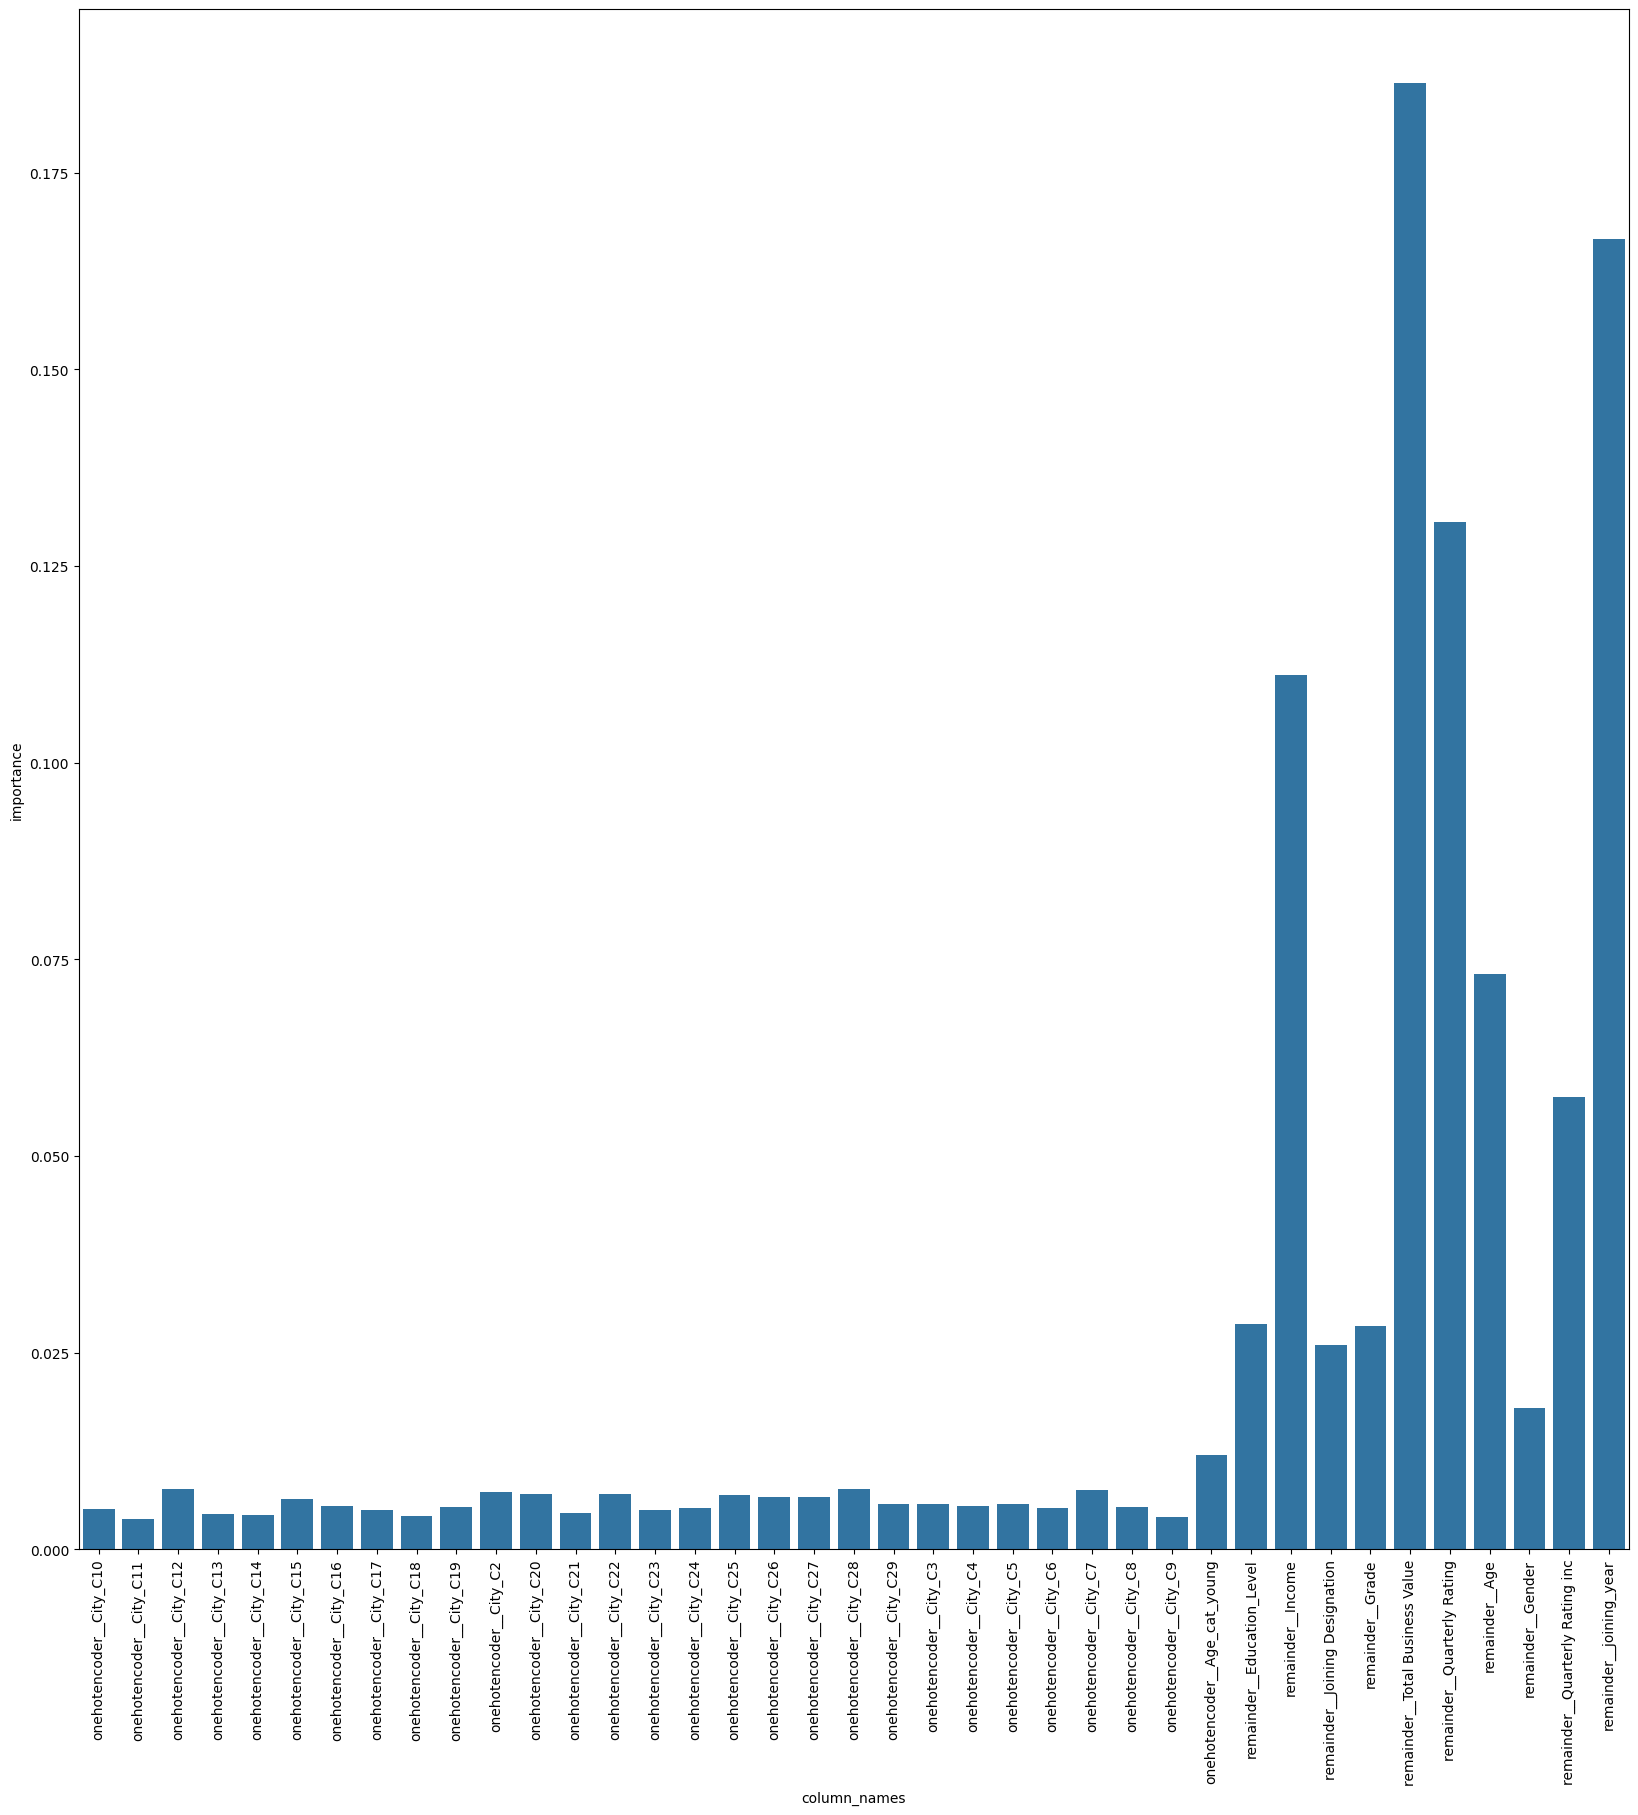

In [161]:
plt.figure(figsize=(20,20))

plt.xticks(rotation=90)
sns.barplot(data=imp_df,x='column_names',y='importance')

- As per above feature importance graph we can say that total business value has the highest imprtance.

### Actionable Insights & Recommendations

- To build better model we need more data.
- as per above analysis city C20 has highest leaving percentage so OLA needs to focus on that city more.
- OLA can provide bonus to the driver who are staying in the organization for long time. to retain this drivers.
- we can try feedback loop to collect latest trends data

### Model saving

In [164]:
from joblib import dump, load
dump(pipeline, 'model.joblib') 

['model.joblib']

### prediction

In [165]:
X_train.columns

Index(['Education_Level', 'Income', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Age', 'Gender', 'City',
       'Quarterly Rating inc', 'Age_cat', 'joining_year'],
      dtype='object')

In [192]:
X_test[:1]

,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Age,Gender,City,Quarterly Rating inc,Age_cat,joining_year
1446,0,57627,1,1,152890,1,27.0,1.0,C14,0,young,2020


In [193]:
model = load('model.joblib')

model.predict(X_test[:1])

array([1], dtype=int64)